In [1]:
# Import libraries
# SQLAlchemy
from sqlalchemy import create_engine
from sqlalchemy import inspect
from config import db_password

# Pandas
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix


from sklearn.linear_model import LogisticRegression

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report
from imblearn.ensemble import EasyEnsembleClassifier

from sklearn.svm import SVC
import sklearn as skl
import tensorflow as tf

In [2]:
# file = 'clean_ml_data.csv'
# clean_df = pd.read_csv(file)

In [3]:
# test_df = clean_df.sample(30000)

In [4]:
# file_export = 'Sample_clean_ml_data.csv'
# test_df.to_csv(file_export,index = False)

In [5]:
file = 'Sample_clean_ml_data_new.csv'
test_df = pd.read_csv(file)

In [6]:
test_df

,gender,pneumonia,pregnant,diabetes,copd,asthma,immunosup,hypertension,cardiovascular,obesity,renal_chronic,tobacco,closed_contact,another_complication,death,intubation,ICU,new_age
0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,4
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,4
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
29996,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
29997,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,3
29998,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3


In [7]:
y= test_df['death']
X = test_df.drop(columns = ['ICU','intubation','death'])

In [8]:
X

,gender,pneumonia,pregnant,diabetes,copd,asthma,immunosup,hypertension,cardiovascular,obesity,renal_chronic,tobacco,closed_contact,another_complication,new_age
0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,4
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
29996,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
29997,1,0,0,0,0,0,0,0,0,1,0,0,1,0,3
29998,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3


### Data Preprocessing - Split, Standardization

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42, stratify=y)

In [10]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting standard scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Data Preprocessing - Use SMOTE resampling method

In [11]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled_s, y_resampled_s = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(X_train_scaled,y_train)
Counter(y_resampled_s)

Counter({0: 20174, 1: 20174})

In [12]:
# # Use SMOTEENN resampling method
# from imblearn.combine import SMOTEENN 
# smote_enn = SMOTEENN(random_state=0)
# X_resampled_smn, y_resampled_smn = smote_enn.fit_resample(X_train_scaled,y_train)
# Counter(y_resampled_smn)

### Use Logistic Regression Classifer and SVM model

In [13]:
ml = {
    "Support Vector Machines": SVC(kernel='linear'),
    "LogisticRegression": LogisticRegression(max_iter=1000,solver='lbfgs', random_state=1),
}

results = []
for x in ml:
    model = ml[x]
    model.fit(X_resampled_s, y_resampled_s)
    y_pred_s = model.predict(X_test_scaled)
    accuracy = model.score(X_test_scaled, y_test)
    balanced_accuracy = balanced_accuracy_score(y_test,y_pred_s)
    print(f'model{x}: {confusion_matrix(y_test,y_pred_s)}')
    results.append({
    "name": x,
    "Accuracy":accuracy,
    "Balanced_Accuracy":balanced_accuracy,
})
pd.DataFrame(results).sort_values("Accuracy", ascending=False)

modelSupport Vector Machines: [[5812  913]
 [ 103  672]]
modelLogisticRegression: [[5785  940]
 [ 101  674]]


,name,Accuracy,Balanced_Accuracy
0,Support Vector Machines,0.864533,0.865667
1,LogisticRegression,0.861200,0.864950


### Use Deep Learning Model

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_of_features = len(X_resampled_s[0])
first_layer_unit = 80
second_layer_unit = 30
first_activation = 'relu'
second_activation = 'relu'

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units = first_layer_unit,input_dim = number_of_features,activation = first_activation))

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units = second_layer_unit,activation = second_activation))

# Output layer
nn.add(
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                1280      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,741
Trainable params: 3,741
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["Accuracy","TruePositives",'FalseNegatives'])

In [16]:
# Train the model
fit_model = nn.fit(X_resampled_s, y_resampled_s,epochs = 50)

Epoch 1/50
1261/1261 [==============================] - 11s 5ms/step - loss: 0.3383 - Accuracy: 0.8591 - true_positives: 17854.0000 - false_negatives: 2320.0000
Epoch 2/50
1261/1261 [==============================] - 7s 6ms/step - loss: 0.3179 - Accuracy: 0.8694 - true_positives: 18184.0000 - false_negatives: 1990.0000
Epoch 3/50
1261/1261 [==============================] - 8s 6ms/step - loss: 0.3149 - Accuracy: 0.8699 - true_positives: 18194.0000 - false_negatives: 1980.0000
Epoch 4/50
1261/1261 [==============================] - 8s 6ms/step - loss: 0.3126 - Accuracy: 0.8711 - true_positives: 18220.0000 - false_negatives: 1954.0000
Epoch 5/50
1261/1261 [==============================] - 9s 7ms/step - loss: 0.3109 - Accuracy: 0.8726 - true_positives: 18170.0000 - false_negatives: 2004.0000
Epoch 6/50
1261/1261 [==============================] - 7s 6ms/step - loss: 0.3094 - Accuracy: 0.8729 - true_positives: 18224.0000 - false_negatives: 1950.0000
Epoch 7/50
1261/1261 [=================

In [17]:
# Evaluate the model using the test data : Recall: tp/(tp+fn) 0.829236
results = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(results)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

235/235 - 4s - loss: 0.3701 - Accuracy: 0.8428 - true_positives: 636.0000 - false_negatives: 139.0000 - 4s/epoch - 19ms/step
[0.3700968027114868, 0.8428000211715698, 636.0, 139.0]


### Use Gradient Boosting Classifer

In [18]:
# choose the best learning rate
from sklearn.ensemble import GradientBoostingClassifier
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_resampled_s, y_resampled_s)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_resampled_s, y_resampled_s)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.870
Accuracy score (validation): 0.865

Learning rate:  0.1
Accuracy score (training): 0.872
Accuracy score (validation): 0.859

Learning rate:  0.25
Accuracy score (training): 0.880
Accuracy score (validation): 0.865

Learning rate:  0.5
Accuracy score (training): 0.882
Accuracy score (validation): 0.856

Learning rate:  0.75
Accuracy score (training): 0.886
Accuracy score (validation): 0.867

Learning rate:  1
Accuracy score (training): 0.888
Accuracy score (validation): 0.866



### Fit the GBC model

In [19]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=1,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_resampled_s, y_resampled_s)

# Make Prediction
y_gbc_pred = classifier.predict(X_test_scaled)
# pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(20)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_gbc_pred)
balanced_score = balanced_accuracy_score(y_test, y_gbc_pred)
print(f"Accuracy Score : {acc_score}, Balanced Accuracy Score :{balanced_score}")

Accuracy Score : 0.8662666666666666, Balanced Accuracy Score :0.8455138505816044


In [20]:
# # Generate classification report
# print("Classification Report")
# print(classification_report(y_test, y_gbc_pred))

In [21]:
# Generate imbalanced classification report
print(classification_report_imbalanced(y_test, y_gbc_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.87      0.82      0.92      0.85      0.72      6725
          1       0.42      0.82      0.87      0.56      0.85      0.71       775

avg / total       0.92      0.87      0.82      0.88      0.85      0.72      7500



In [22]:
# Generate confusion matrix report
print(confusion_matrix(y_test, y_gbc_pred))

[[5862  863]
 [ 140  635]]


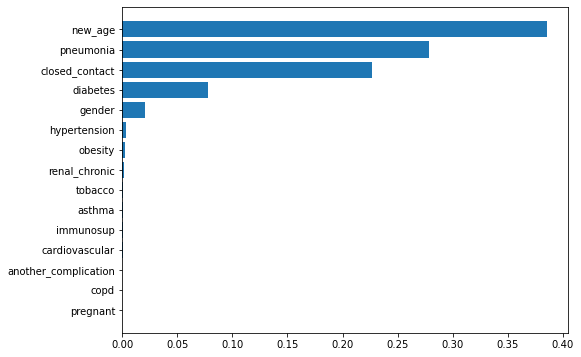

In [31]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = classifier.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)
# x = range(X.shape[1])
x = np.arange(sorted_index.shape[0]) + .5
# Create tick labels 
labels = np.array(X.columns)[sorted_index]
plt.figure(figsize=(8, 6))
plt.barh(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.yticks()
plt.show()

In [24]:
# Train on the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=1,n_estimators = 100)

eec.fit(X_train_scaled,y_train)

# Calculated the balanced accuracy score

y_pred_eec = eec.predict(X_test_scaled)

print(f"Use 'Death' as target, balanced_accuracy_score is: {balanced_accuracy_score(y_test, y_pred_eec)}")
print(classification_report_imbalanced(y_test, y_pred_eec))
print(confusion_matrix(y_test,y_pred_eec))

Use 'Death' as target, balanced_accuracy_score is: 0.8631562537474518
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.87      0.85      0.92      0.86      0.75      6725
          1       0.43      0.85      0.87      0.58      0.86      0.74       775

avg / total       0.92      0.87      0.86      0.89      0.86      0.75      7500

[[5865  860]
 [ 113  662]]
